In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
with open("../data/News_Category_Dataset_v3.json", "r") as file:
    data = []
    for line in file:
        data.append(json.loads(line.strip()))

df = pd.DataFrame(data)
df = df.dropna(subset=["headline", "category"])
print(df.head())

                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog y

In [3]:
df["headline"] = df["headline"].str.replace(r'[^\w\s]', '', regex=True)
df["headline"] = df["headline"].str.lower()

print(df.head())

                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  over 4 million americans roll up sleeves for o...  U.S. NEWS   
1  american airlines flyer charged banned for lif...  U.S. NEWS   
2  23 of the funniest tweets about cats and dogs ...     COMEDY   
3  the funniest tweets from parents this week sep...  PARENTING   
4  woman who called cops on black birdwatcher los...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog y

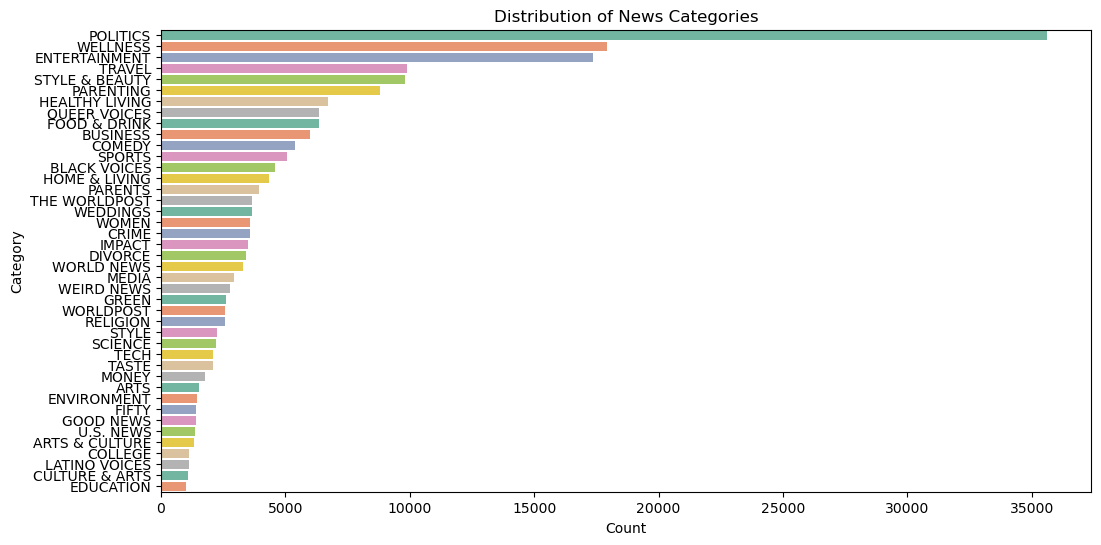

In [4]:
plt.figure(figsize=(12,6))
sns.countplot(y="category", data=df, order=df["category"].value_counts().index, palette="Set2")
plt.title("Distribution of News Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [6]:
label_encoder = LabelEncoder()
df["category"] = label_encoder.fit_transform(df["category"])

In [7]:
X = df["headline"]
y = df["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

In [10]:
y_test_labels = label_encoder.inverse_transform(y_test)
lr_preds_labels = label_encoder.inverse_transform(lr_preds)

In [ ]:
print("Logistic Regression Performance:")
print(classification_report(y_test_labels, lr_preds_labels))

Logistic Regression Performance:
                precision    recall  f1-score   support

          ARTS       0.46      0.17      0.24       293
ARTS & CULTURE       0.24      0.07      0.11       275
  BLACK VOICES       0.45      0.27      0.34       889
      BUSINESS       0.45      0.38      0.41      1216
       COLLEGE       0.43      0.31      0.36       202
        COMEDY       0.55      0.38      0.45      1022
         CRIME       0.50      0.49      0.49       713
CULTURE & ARTS       0.70      0.24      0.36       202
       DIVORCE       0.77      0.59      0.67       664
     EDUCATION       0.44      0.22      0.29       209
 ENTERTAINMENT       0.52      0.71      0.60      3419
   ENVIRONMENT       0.65      0.19      0.29       313
         FIFTY       0.41      0.08      0.14       263
  FOOD & DRINK       0.60      0.65      0.62      1270
     GOOD NEWS       0.44      0.15      0.22       270
         GREEN       0.33      0.25      0.28       532
HEALTHY LIVING

In [12]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = lr_model.predict(X_test_tfidf)

In [13]:
y_test_labels = label_encoder.inverse_transform(y_test)
lr_preds_labels = label_encoder.inverse_transform(nb_preds)

In [14]:
print("Naive Bayes Performance:")
print(classification_report(y_test_labels, lr_preds_labels))

Naive Bayes Performance:
                precision    recall  f1-score   support

          ARTS       0.46      0.17      0.24       293
ARTS & CULTURE       0.24      0.07      0.11       275
  BLACK VOICES       0.45      0.27      0.34       889
      BUSINESS       0.45      0.38      0.41      1216
       COLLEGE       0.43      0.31      0.36       202
        COMEDY       0.55      0.38      0.45      1022
         CRIME       0.50      0.49      0.49       713
CULTURE & ARTS       0.70      0.24      0.36       202
       DIVORCE       0.77      0.59      0.67       664
     EDUCATION       0.44      0.22      0.29       209
 ENTERTAINMENT       0.52      0.71      0.60      3419
   ENVIRONMENT       0.65      0.19      0.29       313
         FIFTY       0.41      0.08      0.14       263
  FOOD & DRINK       0.60      0.65      0.62      1270
     GOOD NEWS       0.44      0.15      0.22       270
         GREEN       0.33      0.25      0.28       532
HEALTHY LIVING       0